<a href="https://colab.research.google.com/github/scadriano/lia1-2023-2/blob/main/Introdu%C3%A7%C3%A3o%20Aprendizado%20de%20M%C3%A1quina/Aula_10_Aprendizado_de_M%C3%A1quina_Regress%C3%A3o_Linear_(S_e_M).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Machine Learning e Data Science - Regressão (2)**
Construiremos 3 projetos:
  1. Modelo de regressão linear simples para fazer a previsão do custo do plano de saúde, usando a idade como previsor;
  2. Modelo de regressão linear simples para fazer a previsão do preço de casas, usando a metragem como previsor;
  3. Modelo de regressão linear múltipla para fazer a previsão do preço de casas, usando algumas variáveis como previsor.

**Atenção: Regressão linear implementa a fórmula da reta!**

## Pré-processamento - Plano Saúde

In [ ]:
#import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [ ]:
base_plano_saude = pd.read_csv('/content/plano_saude_curva.csv')
base_plano_saude

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [ ]:
# Variável que armazena o atributo previsor (idade)
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
# Variável que armazena o atributo classe (custo)
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

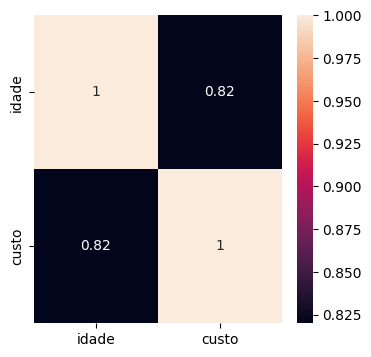

In [ ]:
# Calcular o coeficiente de correlação entre X e y
import matplotlib.pyplot as plt
import seaborn as sns

figura = plt.figure(figsize=(4,4))
sns.heatmap(base_plano_saude.corr(), annot=True);

In [ ]:
# Visualizar o formato dessa variável - é um vetor
X_plano_saude.shape

(10,)

In [ ]:
# Converter para formato matriz com duas dimensões
X_plano_saude = X_plano_saude.reshape(-1,1)
X_plano_saude.shape

(10, 1)

In [ ]:
# Observar a matriz de duas dimensões
X_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

## Regressão Linear Simples - Plano Saúde

In [ ]:
# Importar biblioteca - classe
from sklearn.linear_model import LinearRegression

# Variável recebe uma instância
regressor_plano_saude = LinearRegression()

# Treinamento do modelo de regressão
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [ ]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.6722701203412687

In [ ]:
# Aplica a fórmula da reta
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([-1136.54545455,  -318.42424242,   499.6969697 ,  1317.81818182,
        2135.93939394,  2954.06060606,  3772.18181818,  4590.3030303 ,
        5408.42424242,  6226.54545455])

In [ ]:
# Adicionar os pontos - valor real
import plotly.express as px
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)

# Adicionar a reta
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'Regressão')

grafico.show()

In [ ]:
# Mean mostra a distância para cima ou para baixo
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X_plano_saude, previsoes)

2803.693939393939

## Regressão Linear Simples - Houses Price

In [ ]:
casas_df = pd.read_csv('/content/house_prices_100l_10c.csv')
casas_df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,lat,long,price
0,1,3,1.00,1180,5650,7,1955,47.5112,-122257.0,221900.0
1,2,3,2.25,2570,7242,7,1951,47721.0000,-122319.0,538000.0
2,3,2,1.00,770,10000,6,1933,47.7379,-122233.0,180000.0
3,4,4,3.00,1960,5000,7,1965,47.5208,-122393.0,604000.0
4,5,3,2.00,1680,8080,8,1987,47.6168,-122045.0,510000.0
...,...,...,...,...,...,...,...,...,...,...
95,96,4,2.50,3300,10250,7,1946,47.5873,-122249.0,905000.0
96,97,3,1.75,1960,15681,7,1967,47.3576,-122277.0,247500.0
97,98,4,1.50,1160,6400,7,1975,47.3036,-122378.0,199000.0
98,99,3,1.75,1810,41800,7,1980,47.4109,-121958.0,314000.0


In [ ]:
casas_df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,lat,long,price
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,1.000000e+02
mean,50.500000,3.400000,1.995000,2088.720000,11732.500000,7.61000,1966.87000,4796.326190,-107576.597700,2.599365e+07
std,29.011492,0.791368,0.727334,860.531878,14800.078903,1.04345,28.47457,14318.211284,39880.276386,1.794694e+08
min,1.000000,2.000000,1.000000,770.000000,1044.000000,5.00000,1900.00000,47.289700,-122451.000000,1.530000e+05
25%,25.750000,3.000000,1.500000,1410.000000,5000.000000,7.00000,1948.00000,47.427150,-122339.500000,3.080000e+05
50%,50.500000,3.000000,2.000000,1930.000000,6769.500000,7.00000,1967.50000,47.602050,-122223.500000,4.337500e+05
75%,75.250000,4.000000,2.500000,2570.000000,9881.500000,8.00000,1991.25000,47.683225,-122042.750000,6.531250e+05
max,100.000000,5.000000,4.500000,5420.000000,101930.000000,11.00000,2014.00000,47721.000000,-122.070000,1.325000e+09


In [ ]:
casas_df.isnull().sum()

id             0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
grade          0
yr_built       0
lat            0
long           0
price          0
dtype: int64

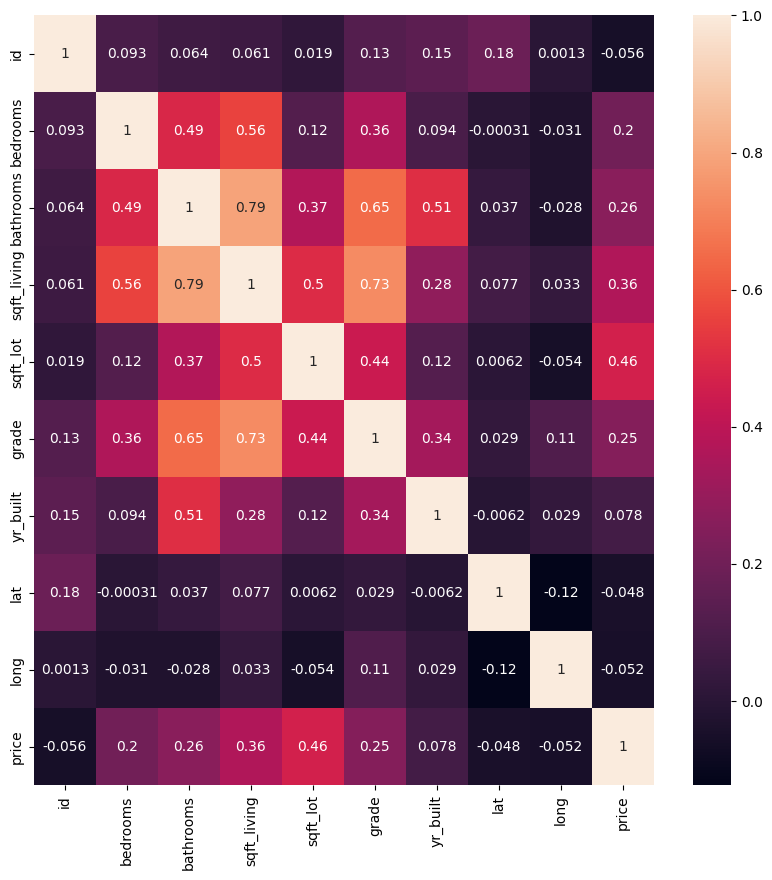

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
figura = plt.figure(figsize=(10,10))
sns.heatmap(casas_df.corr(), annot=True);

In [ ]:
X_casas = casas_df.iloc[:,4:5].values
X_casas

array([[  5650],
       [  7242],
       [ 10000],
       [  5000],
       [  8080],
       [101930],
       [  6819],
       [  9711],
       [  7470],
       [  6560],
       [  9796],
       [  6000],
       [ 19901],
       [  9680],
       [  4850],
       [  5000],
       [ 14040],
       [  4300],
       [  9850],
       [  9774],
       [  4980],
       [ 44867],
       [  6300],
       [  9643],
       [  6500],
       [  4697],
       [  2691],
       [  1581],
       [  6380],
       [  7173],
       [  3980],
       [  1265],
       [  5000],
       [  3000],
       [  6659],
       [  3060],
       [ 34848],
       [  6000],
       [  8075],
       [  7553],
       [  5520],
       [ 24186],
       [  5639],
       [  2280],
       [  9656],
       [ 13603],
       [  8528],
       [ 13416],
       [  5963],
       [ 65005],
       [  9199],
       [  9134],
       [  4080],
       [  8550],
       [  6000],
       [  5000],
       [  4495],
       [  4750],
       [ 14342

In [ ]:
y_casas = casas_df.iloc[:,9].values
y_casas

array([2.21900e+05, 5.38000e+05, 1.80000e+05, 6.04000e+05, 5.10000e+05,
       1.22500e+09, 2.57500e+05, 2.91850e+05, 2.29500e+05, 3.23000e+05,
       6.62500e+05, 4.68000e+05, 3.10000e+05, 4.00000e+05, 5.30000e+05,
       6.50000e+05, 3.95000e+05, 4.85000e+05, 1.89000e+05, 2.30000e+05,
       3.85000e+05, 2.00000e+06, 2.85000e+05, 2.52700e+05, 3.29000e+05,
       2.33000e+05, 9.37000e+05, 6.67000e+05, 4.38000e+05, 7.19000e+05,
       5.80500e+05, 2.80000e+05, 6.87500e+05, 5.35000e+05, 3.22500e+05,
       6.96000e+05, 5.50000e+05, 6.40000e+05, 2.40000e+05, 6.05000e+05,
       6.25000e+05, 7.75000e+05, 8.61990e+05, 6.85000e+05, 3.09000e+05,
       4.88000e+05, 2.10490e+05, 7.85000e+05, 4.50000e+05, 1.35000e+06,
       2.28000e+05, 3.45000e+05, 6.00000e+05, 5.85000e+05, 9.20000e+05,
       8.85000e+05, 2.92500e+05, 3.01000e+05, 9.51000e+05, 4.30000e+05,
       6.50000e+05, 2.89000e+05, 5.05000e+05, 5.49000e+05, 4.25000e+05,
       3.17625e+05, 9.75000e+05, 2.87000e+05, 2.04000e+05, 1.325

In [ ]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

In [ ]:
X_casas_treinamento.shape, y_casas_treinamento.shape

((70, 1), (70,))

In [ ]:
X_casas_teste.shape, y_casas_teste.shape

((30, 1), (30,))

In [ ]:
# Modelo de regressão
from sklearn.linear_model import LinearRegression
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [ ]:
regressor_simples_casas.score(X_casas_treinamento, y_casas_treinamento)

0.22799052772938588

In [ ]:
regressor_simples_casas.score(X_casas_teste, y_casas_teste)

-48140.3167822776

In [ ]:
previsoes = regressor_simples_casas.predict(X_casas_treinamento)
previsoes

array([ 8.75648403e+07, -1.03222082e+07,  3.64952239e+06,  3.19630554e+07,
        1.41510706e+07, -3.16711095e+07,  1.84948653e+07, -1.39925933e+07,
       -3.49289555e+07,  2.65284282e+08,  2.67277527e+06,  9.69807445e+06,
       -7.05222868e+06,  1.05467826e+08,  7.75671371e+06, -1.09288834e+07,
       -1.51756100e+07, -7.77417220e+06,  7.72637995e+06,  5.77121418e+08,
       -2.72056753e+06,  1.92592761e+07, -6.98549440e+06, -8.64141323e+05,
       -2.55676522e+06,  1.45454095e+07, -4.86213109e+06, -2.26983829e+07,
        1.72390476e+07, -1.65102955e+07,  1.81672607e+07, -3.35882033e+07,
        2.57689013e+07, -1.24455715e+07,  1.99484287e+08, -1.94223366e+07,
       -1.09288834e+07, -1.01581013e+06, -1.18388962e+07, -3.47954870e+07,
        1.80337921e+07,  2.25416936e+06,  3.53106589e+08, -2.43543017e+06,
        2.12327602e+08,  8.10309481e+07, -1.10502184e+07, -1.09288834e+07,
        6.10049033e+06, -1.05648783e+07, -1.27671094e+07, -4.86213109e+06,
       -5.53554060e+06,  

In [ ]:
# Mean mostra a distância para cima ou para baixo
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X_casas_treinamento, previsoes)

49514562.7873207

In [ ]:
grafico = px.scatter(x = X_casas_treinamento.ravel(), y = previsoes)
grafico.show()

## Regressão Linear Múltipla - Houses Price

In [ ]:
casas_df = pd.read_csv('/content/houses_price.csv')
casas_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122257.0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47721.0000,-122319.0,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122233.0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122393.0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122045.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122346.0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122362.0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122299.0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122069.0,1410,1287


In [ ]:
casas_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,4.133842e+07,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,4501.541441,-109898.947043,1986.552492,12768.455652
std,2.876566e+09,2.584552e+08,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,13849.199763,36768.975764,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122519.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.485600,-122318.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.594500,-122205.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.698500,-122062.000000,2360.000000,10083.000000
max,9.900000e+09,6.885000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47777.000000,-121.480000,6210.000000,871200.000000


In [ ]:
casas_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<ipython-input-59-fa1685b1a21b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



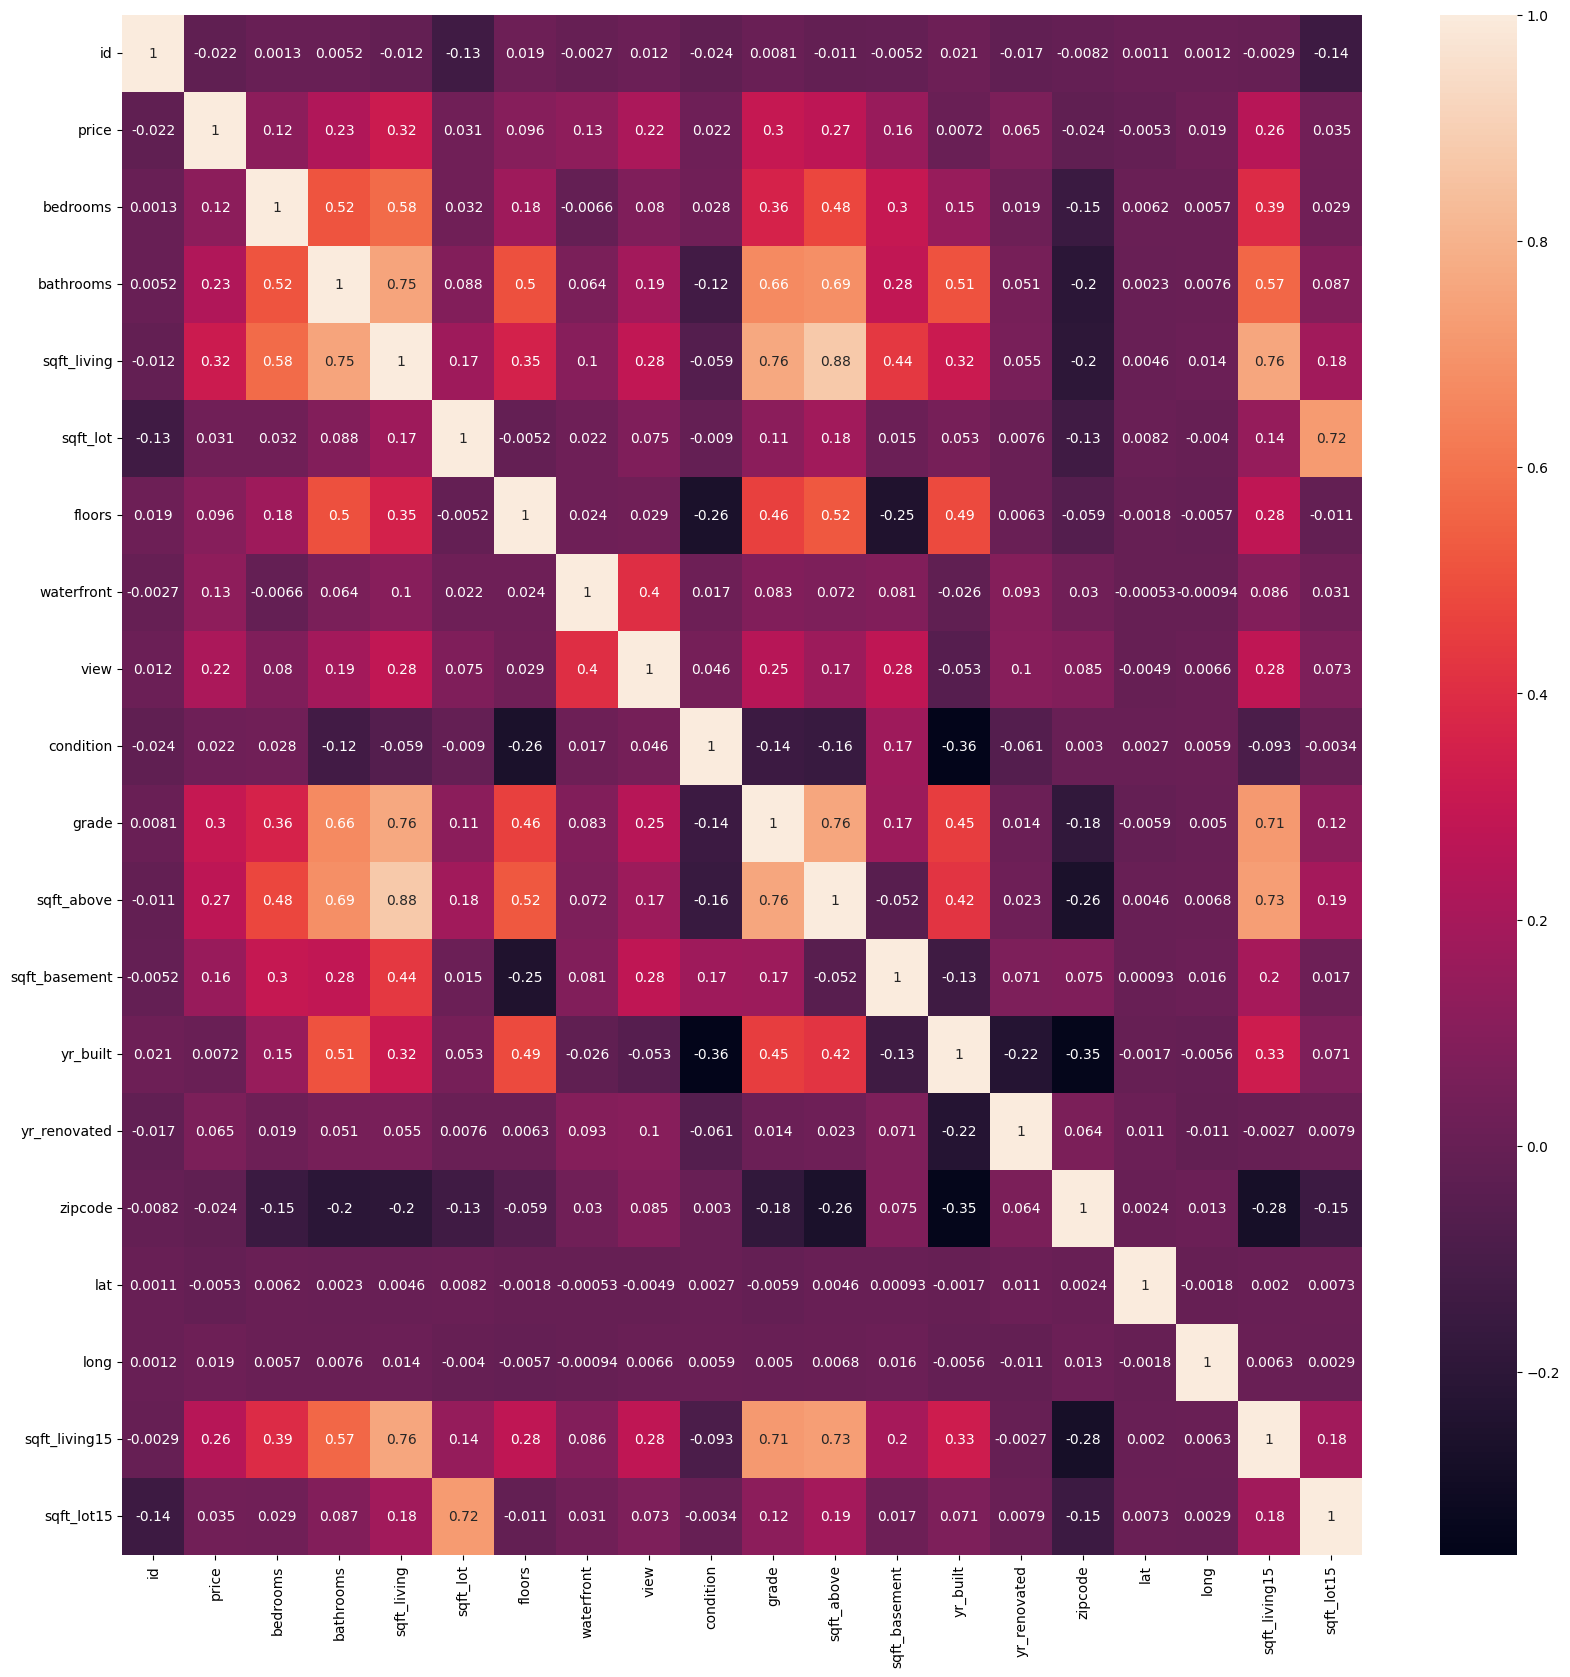

In [ ]:
figura = plt.figure(figsize=(20,20));
sns.heatmap(casas_df.corr(), annot=True);

In [ ]:
X_casas = casas_df.iloc[:,3:21].values
X_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+05,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+05,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+05,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+05,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+05,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+05,
         1.02000e+03,  1.35700e+03]])

In [ ]:
y_casas = casas_df.iloc[:,2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

In [ ]:
X_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 18), (15129,))

In [ ]:
X_casas_teste.shape, y_casas_teste.shape

((6484, 18), (6484,))

In [ ]:
#from sklearn.linear_model import LinearRegression
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [ ]:
regressor_multiplo_casas.score(X_casas_treinamento, y_casas_treinamento)

0.1426994961233944

In [ ]:
regressor_multiplo_casas.score(X_casas_teste, y_casas_teste)

0.15307650539624706

In [ ]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
previsoes

array([-4.18124053e+07,  3.28985170e+08,  4.60923711e+07, ...,
       -2.43915902e+07, -2.57058953e+07, -3.24198238e+07])

In [ ]:
# Mean mostra a distância para cima ou para baixo
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

96685721.00316265